In [1]:
from pyntcloud import PyntCloud
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point

In [2]:
lidar_cloud = PyntCloud.from_file(os.path.join("data", "lidar_data03.pcd"))
lcpoints = lidar_cloud.points

# Display the star shape from rotating rectangles

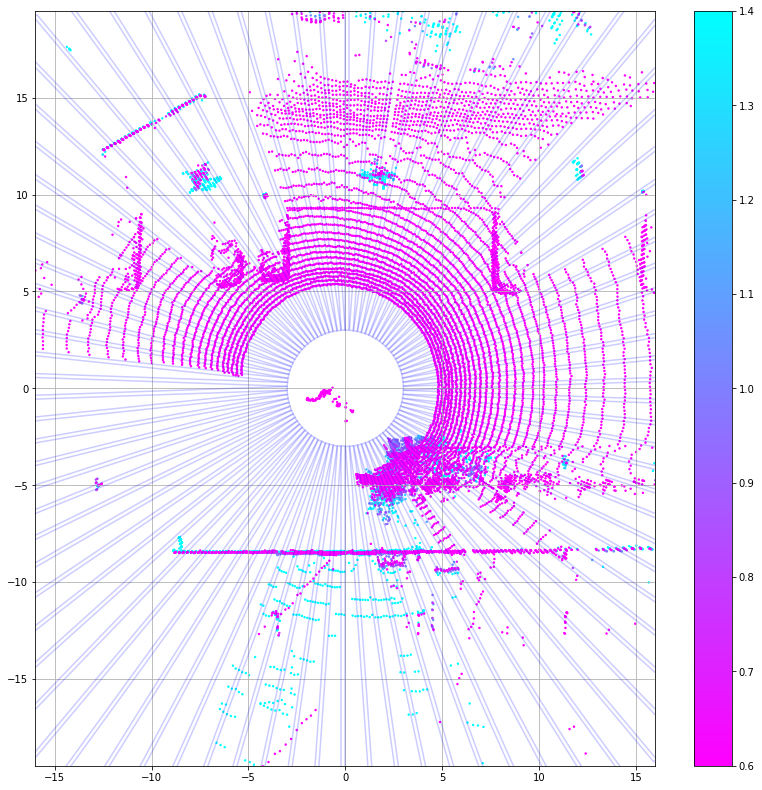

In [3]:
cm1 = plt.cm.get_cmap("cool_r")
cm2 = plt.cm.get_cmap("turbo")
px = 1/plt.rcParams['figure.dpi']  # pixel in inches
fig1 = plt.figure(figsize=(1000*px, 1000*px))
lcpoints = lcpoints[lcpoints.x > -20].dropna()
lcpoints = lcpoints[lcpoints.x <  20].dropna()
lcpoints = lcpoints[lcpoints.y > -20].dropna()
lcpoints = lcpoints[lcpoints.y <  20].dropna()
filter_arr = (lcpoints.x > 0.00001) | (lcpoints.x < -0.00001) | (lcpoints.y > 0.00001) | (lcpoints.y < -0.00001)
lcpoints = lcpoints[filter_arr]
plt.scatter(lcpoints.x, lcpoints.y, c = lcpoints.z, vmin=0.6, vmax=1.4, s=2.0, cmap=cm1)
plt.colorbar()
plt.axis('equal')
plt.xlim(-16, 16)
plt.ylim(-16, 16)
plt.grid()
# rect0 is a rectangle, which will be rotated (rect_rot)
rect0 = np.array([[0, 3], [0, 25], [0.2, 25], [0.2, 3], [0, 3]], dtype=np.float32)
for rot in range(90):
    rot = 4*(np.deg2rad(rot))
    t0 = np.array([[np.cos(rot), np.sin(rot)], [-np.sin(rot), np.cos(rot)]])
    rect_rot = np.dot(rect0, t0)
    plt.plot(rect_rot[:, 0], rect_rot[:, 1], "b-", alpha=0.2)
plt.show()

# Slice one of the rectangles

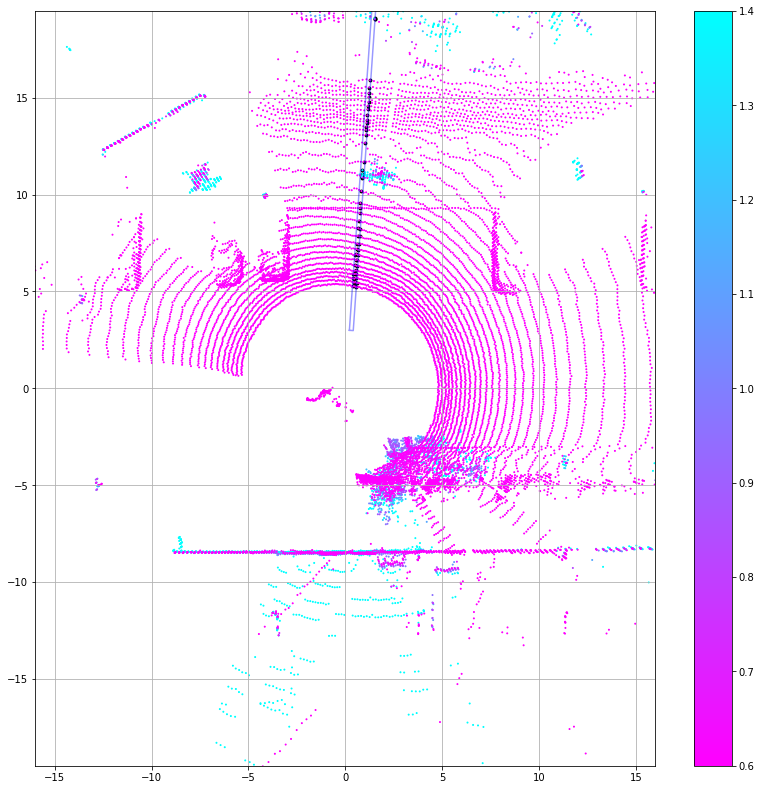

In [4]:
fig2 = plt.figure(figsize=(1000*px, 1000*px))

# adds a column that contains a boolean variable for each point
lcpoints["polygon1"] = lcpoints.apply(lambda row: Polygon(rect_rot).contains(Point(row["x"], row["y"])), axis = 1)
# filtering out the the slice
lcpoints_slice = lcpoints.drop(lcpoints[~lcpoints["polygon1"]].index)
plt.scatter(lcpoints_slice.x, lcpoints_slice.y, s=8.0, c="#000000")
plt.scatter(lcpoints.x, lcpoints.y, c = lcpoints.z, vmin=0.6, vmax=1.4, s=1.0, cmap=cm1)
plt.plot(rect_rot[:, 0], rect_rot[:, 1], "b-", alpha=0.4)
plt.colorbar()
plt.axis('equal')
plt.xlim(-16, 16)
plt.ylim(-16, 16)
plt.grid()
plt.show()


# Display the slice Z elevations
Distance and elevation plot

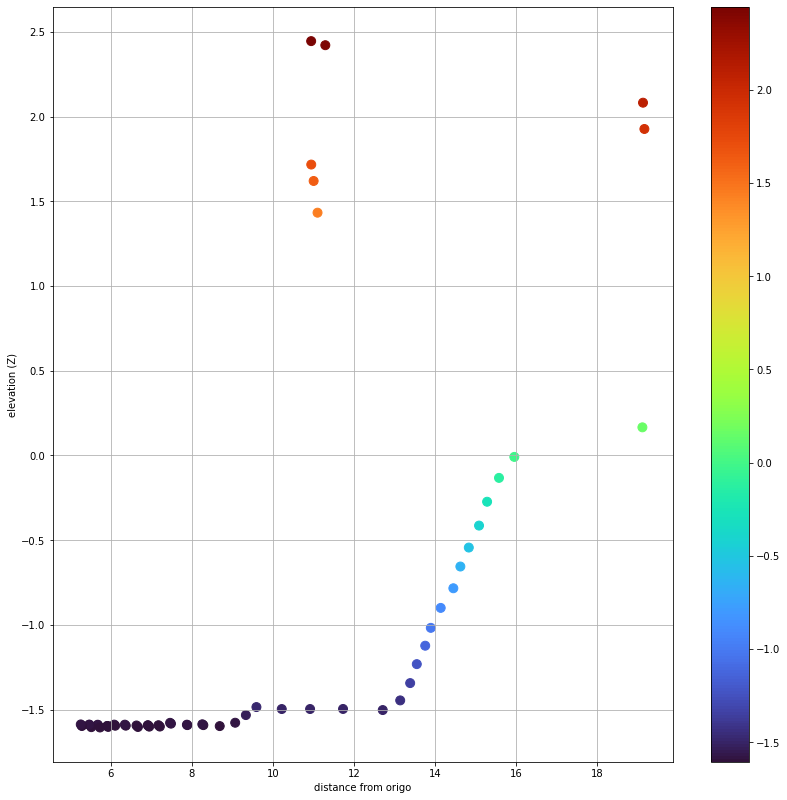

In [5]:
fig3 = plt.figure(figsize=(1000*px, 1000*px))
# distance sqrt(x^2 + y^2) / elevation (z dimension) plot 
plt.scatter((lcpoints_slice.x**2 + lcpoints_slice.y**2)**0.5, lcpoints_slice.z, c = lcpoints_slice.z, s = 80.0, cmap=cm2)
plt.colorbar()
plt.grid()
ax = plt.gca()
ax.set_xlabel("distance from origo")
ax.set_ylabel("elevation (Z)")
plt.show()